**Data Mining & Pattern Discovery(Boston Housing DS)**

In [67]:
# Loading the dataset

In [68]:
from sklearn.datasets import fetch_california_housing
import pandas as pd

# Load the dataset
california = fetch_california_housing()

# Create a DataFrame
california_df = pd.DataFrame(california.data, columns=california.feature_names)

# Add the target variable
california_df['MedHouseVal'] = california.target

In [69]:
california_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


**Explanation of features:**

1. **MedInc**: Median income in block group.
2. **HouseAge**: Median house age in block group.
3. **AveRooms**: Average number of rooms per household.
4. **AveBedrms**: Average number of bedrooms per household.
5. **Population**: Population in block group.
6. **AveOccup**: Average number of occupants per household.
7. **Latitude**: Latitude of block group.
8. **Longitude**: Longitude of block group.

The target variable is **MedHouseVal**, which represents the median house value in $100,000s.

In [70]:
# preprocessing

In [71]:
california_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [72]:
# check for duplicate data
duplicates = california_df.duplicated()
duplicate_rows = california_df[duplicates]
duplicate_count = duplicates.sum()

if duplicate_count!=0 :
  print("Duplicate Rows:")
  print(duplicate_rows)

print(f"\nTotal Duplicate Rows: {duplicate_count}")


Total Duplicate Rows: 0


so there is no missing data , duplicate data , wrong data type.

In [73]:
# creating new features

In [74]:
# checking if the house has 2 other rooms rather than bedrooms. so there maybe a kitchen and a restroom
california_df['ExtraRooms'] = california_df['AveRooms'] - california_df['AveBedrms']


In [75]:
# these are the number of houses with only 2 extra rooms (probably a kitchen and a restroom)
num_rows = (california_df['ExtraRooms'] == 2).sum()
print(num_rows)

6


In [76]:
# these are the rooms with less rooms (probably they dont even have a kitchen or restroom)
num_rows = (california_df['ExtraRooms'] < 2).sum()
print(num_rows)

472


In [77]:
# so creating a new feature 'ExNecRooms' (existing necessary rooms)
def categorize_rooms(extra_rooms):
    if extra_rooms == 2:
        return 'nec'
    elif extra_rooms < 2:
        return 'less'
    else:
        return 'more'

california_df['ExNecRooms'] = california_df['ExtraRooms'].apply(categorize_rooms)

In [78]:
california_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal,ExtraRooms,ExNecRooms
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526,5.960317,more
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585,5.266257,more
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521,7.214689,more
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413,4.744292,more
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422,5.200772,more


In [79]:
# calculating the average surface of houses in every block
california_df['AveSurf'] = california_df['Latitude'] * california_df['Longitude']
california_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal,ExtraRooms,ExNecRooms,AveSurf
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526,5.960317,more,-4630.0724
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585,5.266257,more,-4627.2492
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521,7.214689,more,-4626.7840
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413,4.744292,more,-4627.1625
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422,5.200772,more,-4627.1625


In [80]:
# how many houses exist in a block
california_df['NumHouse'] = california_df['Population'] / california_df['AveOccup']
california_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal,ExtraRooms,ExNecRooms,AveSurf,NumHouse
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526,5.960317,more,-4630.0724,126.0
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585,5.266257,more,-4627.2492,1138.0
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521,7.214689,more,-4626.7840,177.0
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413,4.744292,more,-4627.1625,219.0
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422,5.200772,more,-4627.1625,259.0


In [81]:
# rest of the preprocessing

In [82]:
# moving target column from 8th to last
target_column = california_df.pop('MedHouseVal')
california_df['MedHouseVal'] = target_column
california_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,ExtraRooms,ExNecRooms,AveSurf,NumHouse,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,5.960317,more,-4630.0724,126.0,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,5.266257,more,-4627.2492,1138.0,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,7.214689,more,-4626.7840,177.0,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,4.744292,more,-4627.1625,219.0,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,5.200772,more,-4627.1625,259.0,3.422


In [83]:
# converting negative numbers to positive ones
california_df['Longitude'] = california_df['Longitude'].abs()
california_df['AveSurf'] = california_df['AveSurf'].abs()

In [84]:
# label encoding
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
california_df['ExNecRooms'] = label_encoder.fit_transform(california_df['ExNecRooms'])
california_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,ExtraRooms,ExNecRooms,AveSurf,NumHouse,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,122.23,5.960317,1,4630.0724,126.0,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,122.22,5.266257,1,4627.2492,1138.0,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,122.24,7.214689,1,4626.7840,177.0,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,122.25,4.744292,1,4627.1625,219.0,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,122.25,5.200772,1,4627.1625,259.0,3.422


In [85]:
# normalization

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
california_df = scaler.fit_transform(california_df)
print(california_df[0])

[0.53966842 0.78431373 0.0435123  0.02046866 0.00894083 0.00149943
 0.5674814  0.78884462 0.05126153 0.5        0.6026699  0.02055583
 0.90226638]


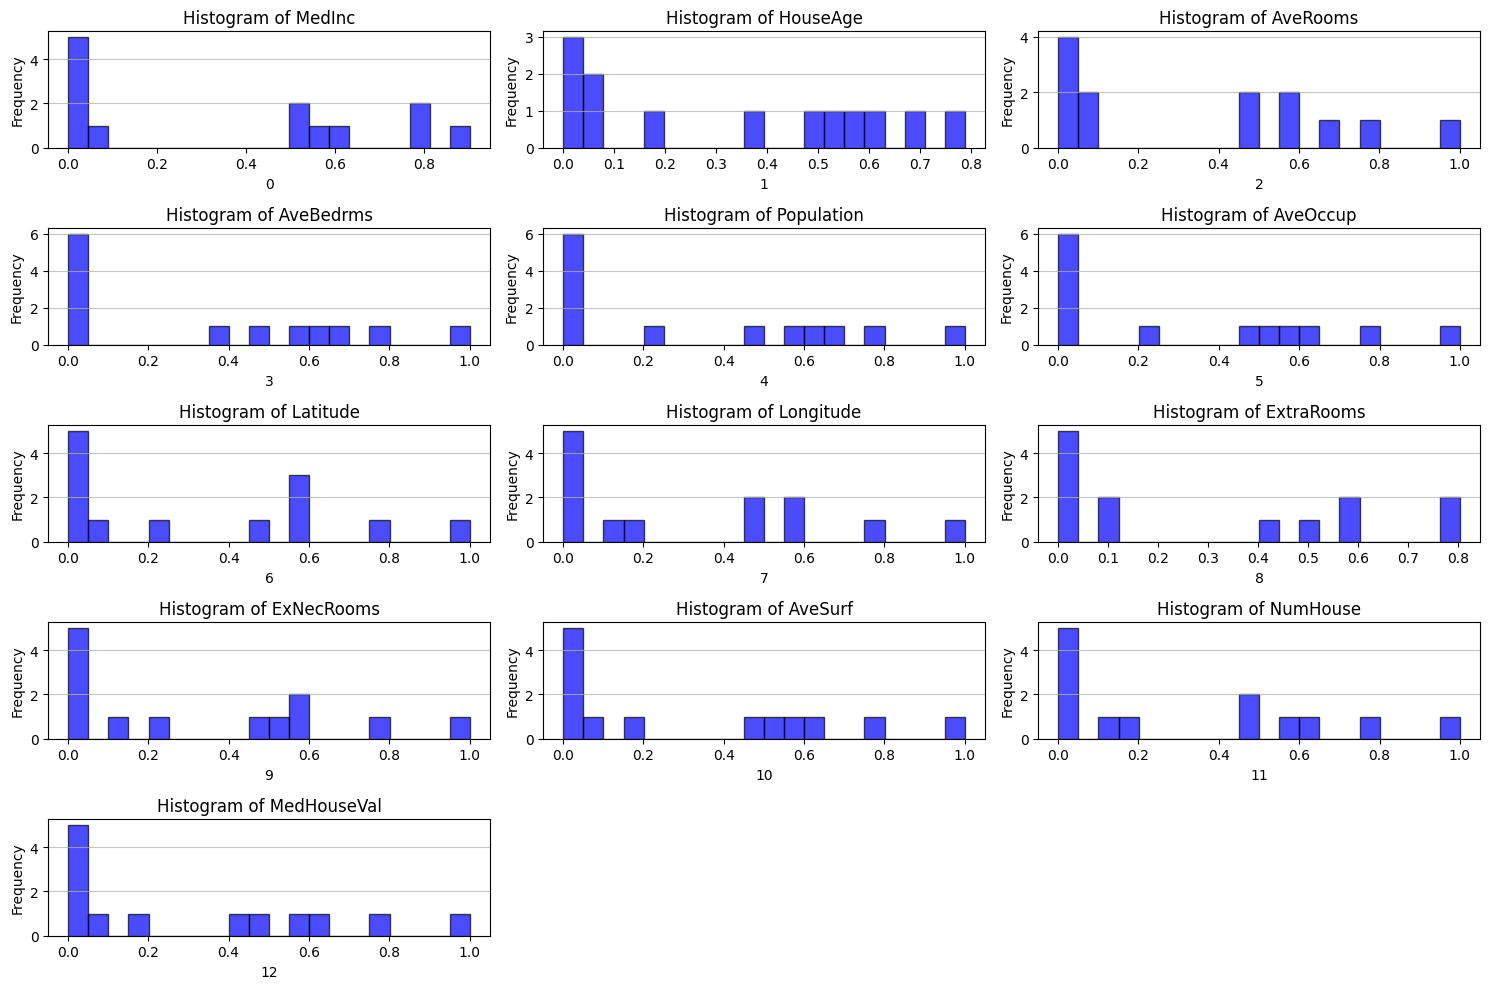

In [86]:
# histogram

import matplotlib.pyplot as plt


features = [i for i in range(13)]
feature_names = [
    'MedInc', 'HouseAge', 'AveRooms', 'AveBedrms',
    'Population', 'AveOccup', 'Latitude',
    'Longitude', 'ExtraRooms',
    'ExNecRooms', 'AveSurf', 'NumHouse', 'MedHouseVal'
]

plt.figure(figsize=(15, 10))

for i, feature in enumerate(features, 1):
    plt.subplot(5, 3, i)
    plt.hist(california_df[feature], bins=20, color='blue', alpha=0.7, edgecolor='black')
    plt.title(f'Histogram of {feature_names[feature]}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.grid(axis='y', alpha=0.75)

plt.tight_layout()
plt.show()

With the help of histograms , we learn how the data is distributed.

For example we see that 'MedInc' feature is distributed in a chi_square graph.

Correlation Matrix:
          0         1         2         3         4         5         6   \
0   1.000000 -0.119034  0.326895 -0.062040  0.004834  0.018766 -0.079809   
1  -0.119034  1.000000 -0.153277 -0.077747 -0.296244  0.013191  0.011173   
2   0.326895 -0.153277  1.000000  0.847621 -0.072213 -0.004852  0.106389   
3  -0.062040 -0.077747  0.847621  1.000000 -0.066197 -0.006181  0.069721   
4   0.004834 -0.296244 -0.072213 -0.066197  1.000000  0.069863 -0.108785   
5   0.018766  0.013191 -0.004852 -0.006181  0.069863  1.000000  0.002366   
6  -0.079809  0.011173  0.106389  0.069721 -0.108785  0.002366  1.000000   
7   0.015176  0.108197  0.027540 -0.013344 -0.099773 -0.002476  0.924664   
8   0.401498 -0.164005  0.992720  0.777540 -0.070555 -0.004347  0.110258   
9   0.157255 -0.051621  0.173740  0.012344 -0.027060 -0.001366  0.059230   
10 -0.060215  0.032359  0.090134  0.052111 -0.108357  0.001225  0.996464   
11  0.013033 -0.302916 -0.080598 -0.054833  0.907222 -0.027309 -0.07

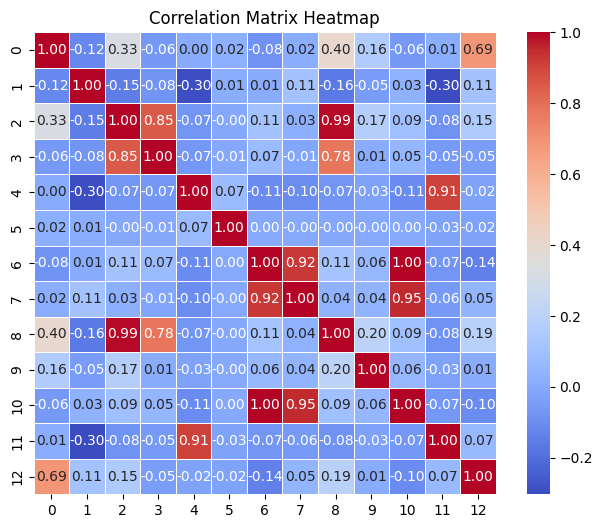

In [87]:
# relational calculations like correlation matrix

import seaborn as sns

california_df = pd.DataFrame(california_df)
correlation_matrix = california_df.corr()

# Display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Visualize the correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True, fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [88]:
# printing the relation between the  features (10 most important ralations and their correlatiom num)
import numpy as np

abs_corr_matrix = correlation_matrix.abs()
corr_pairs = abs_corr_matrix.unstack()

# Delete self-correlations (where features are correlated with themselves)
np.fill_diagonal(correlation_matrix.values, np.nan)
corr_pairs = corr_pairs.dropna()

# Sort the pairs by correlation value in descending order and get the top 10
top_corr_pairs = corr_pairs.sort_values(ascending=False).head(20)

# Print the results
for i ,((feature1, feature2), value) in zip([i for i in range(20)],top_corr_pairs.items()):
    if i%2==0:
      print(f"Correlation between {feature_names[feature1]} and {feature_names[feature2]}: {value:.2f}")

Correlation between MedInc and MedInc: 1.00
Correlation between NumHouse and NumHouse: 1.00
Correlation between ExNecRooms and ExNecRooms: 1.00
Correlation between Longitude and Longitude: 1.00
Correlation between Population and Population: 1.00
Correlation between AveRooms and AveRooms: 1.00
Correlation between MedHouseVal and MedHouseVal: 1.00
Correlation between Latitude and AveSurf: 1.00
Correlation between AveRooms and ExtraRooms: 0.99
Correlation between Longitude and AveSurf: 0.95


In [89]:
# outlier detection with different methods : z-score , iqr , box plot , isolation forrest , dbscan

In [90]:
## Z-Score Method

import numpy as np

def z_score_outliers(df):
    threshold = 3
    z_scores = np.abs((df - df.mean()) / df.std())
    return california_df[(z_scores > threshold).any(axis=1)]

z_outliers = z_score_outliers(california_df)
print("Outliers detected using Z-score:\n", z_outliers)


Outliers detected using Z-score:
              0         1         2         3         4         5         6   \
49     0.087937  0.764706  0.013053  0.021700  0.019535  0.001043  0.561105   
50     0.029096  0.392157  0.008503  0.020778  0.020516  0.000793  0.561105   
73     0.000000  0.882353  0.006154  0.007058  0.000420  0.001512  0.560043   
75     0.029255  0.313725  0.013977  0.021316  0.021273  0.000840  0.560043   
83     0.021214  1.000000  0.011656  0.021484  0.009613  0.001239  0.560043   
...         ...       ...       ...       ...       ...       ...       ...   
20530  0.181873  0.196078  0.029945  0.020223  0.223689  0.001612  0.640808   
20543  0.084909  0.627451  0.021527  0.020652  0.104095  0.001136  0.638682   
20544  0.107936  0.431373  0.028054  0.020167  0.177331  0.002223  0.638682   
20563  0.181039  0.156863  0.030496  0.023308  0.191541  0.001776  0.651435   
20629  0.109957  0.529412  0.033132  0.020382  0.193643  0.002502  0.699256   

             7   

In [91]:
## IQR Method
def iqr_outliers(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return california_df[(california_df < lower_bound) | (california_df > upper_bound)].dropna()

iqr_outliers = iqr_outliers(california_df)
print("Outliers detected using IQR:\n", iqr_outliers)


Outliers detected using IQR:
 Empty DataFrame
Columns: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
Index: []


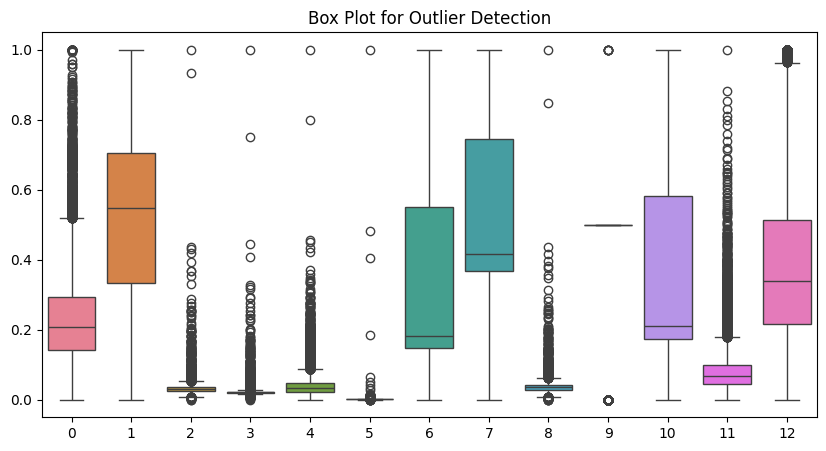

In [92]:
## Box Plot Visualization
plt.figure(figsize=(10,5))
sns.boxplot(data=california_df)
plt.title('Box Plot for Outlier Detection')
plt.show()

In [93]:
## Isolation Forest Method

from sklearn.ensemble import IsolationForest

def isolation_forest_outliers(df):
    iso_forest = IsolationForest(contamination=0.1)
    preds = iso_forest.fit_predict(df)
    return df[preds == -1]

iso_forest_outliers = isolation_forest_outliers(california_df)
print("Outliers detected using Isolation Forest:\n", iso_forest_outliers)



Outliers detected using Isolation Forest:
              0         1         2         3         4         5         6   \
2      0.466028  1.000000  0.052756  0.021940  0.013818  0.001698  0.564293   
49     0.087937  0.764706  0.013053  0.021700  0.019535  0.001043  0.561105   
50     0.029096  0.392157  0.008503  0.020778  0.020516  0.000793  0.561105   
59     0.142246  0.019608  0.013652  0.012482  0.002551  0.000770  0.561105   
63     0.047661  1.000000  0.048574  0.034305  0.014518  0.002080  0.560043   
...         ...       ...       ...       ...       ...       ...       ...   
20543  0.084909  0.627451  0.021527  0.020652  0.104095  0.001136  0.638682   
20544  0.107936  0.431373  0.028054  0.020167  0.177331  0.002223  0.638682   
20563  0.181039  0.156863  0.030496  0.023308  0.191541  0.001776  0.651435   
20621  0.128702  0.705882  0.050172  0.036756  0.013481  0.001924  0.687566   
20629  0.109957  0.529412  0.033132  0.020382  0.193643  0.002502  0.699256   

        

In [94]:
from sklearn.cluster import DBSCAN

def dbscan_outliers(df):
    # Adjusted parameters
    clustering = DBSCAN(eps=5, min_samples=2).fit(df)
    # Return rows classified as outliers
    return df[clustering.labels_ == -1]

# Assuming california_df is your DataFrame
dbscan_outliers_result = dbscan_outliers(california_df)
print("Outliers detected using DBSCAN:\n", dbscan_outliers_result)


Outliers detected using DBSCAN:
 Empty DataFrame
Columns: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
Index: []


In [95]:
# feature selection

from sklearn.decomposition import PCA

target_col = california_df.pop(california_df.columns[-1])
pca = PCA(n_components=10)
X_pca = pca.fit_transform(california_df)
components_df = pd.DataFrame(pca.components_)
print("PCA Components:\n", components_df)

# Calculate feature importance
feature_importance = components_df.abs().sum(axis=0)
print("Feature Importance:\n", feature_importance.sort_values(ascending=False))



PCA Components:
          0         1         2         3         4         5         6   \
0 -0.020568  0.056926  0.003418  0.001470 -0.010391  0.000022  0.604738   
1 -0.081185  0.988652 -0.012408 -0.004574 -0.038897  0.000409 -0.067572   
2  0.975262  0.073127  0.041206 -0.007741 -0.012954  0.001212 -0.069796   
3 -0.096179  0.004416  0.041256  0.016313 -0.098213 -0.000034  0.101620   
4 -0.057139  0.065355 -0.044458 -0.029460  0.387588 -0.001354 -0.138083   
5 -0.149455 -0.098278 -0.085720 -0.050874 -0.144773 -0.003526 -0.474427   
6 -0.071470  0.005214  0.604363  0.514384  0.015636 -0.006494 -0.078911   
7 -0.001806  0.000705  0.013963 -0.054790  0.868783  0.268941  0.002238   
8  0.001044 -0.001001 -0.014255  0.073093 -0.238042  0.961061 -0.002564   
9  0.043421 -0.000858 -0.213580  0.830848  0.074998 -0.063038  0.014502   

         7         8         9         10        11  
0  0.521202  0.003720  0.010580  0.598783 -0.013749  
1  0.020028 -0.013727 -0.020848 -0.047945 -0.0799